# **Entrega 3**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1777
1006
(2783, 2304)
(2783,)


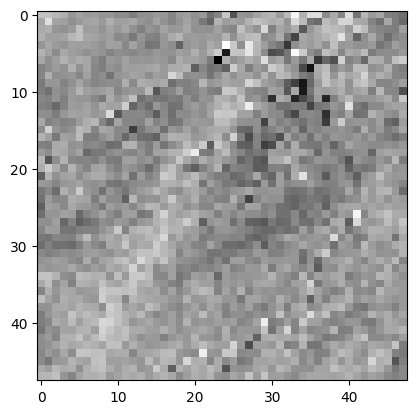

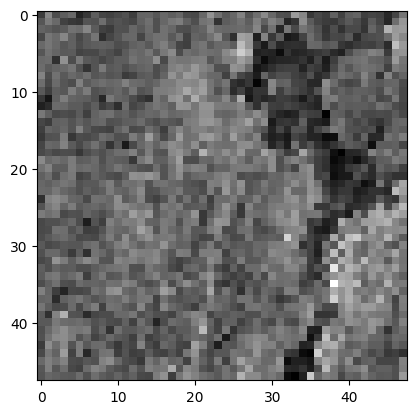

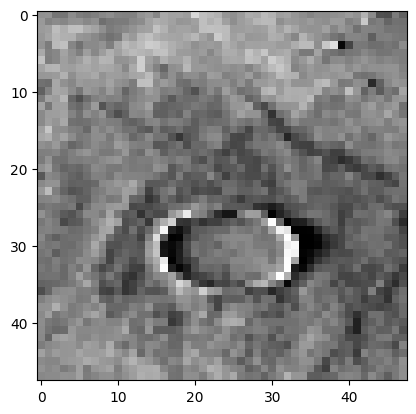

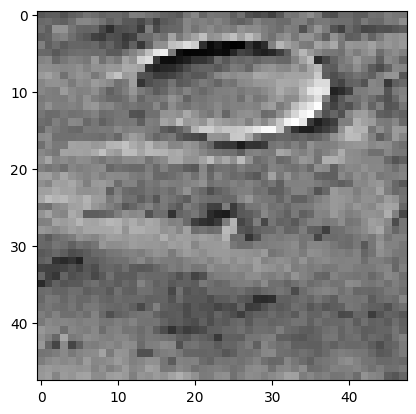

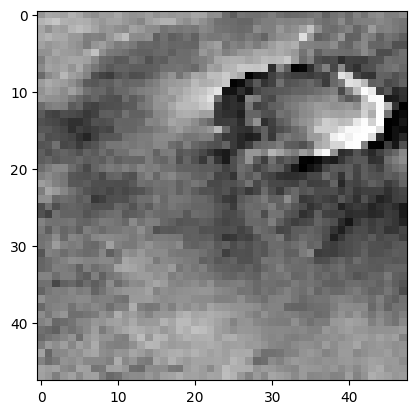

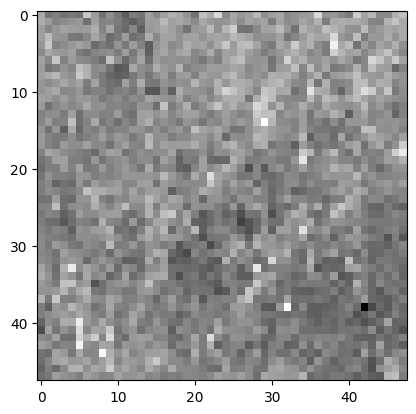

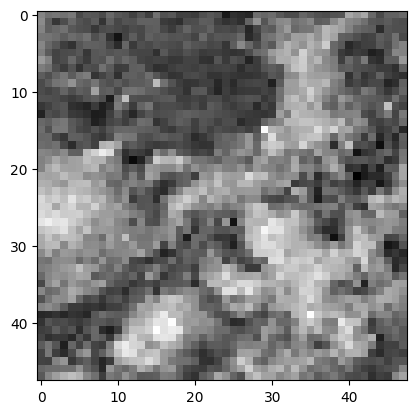

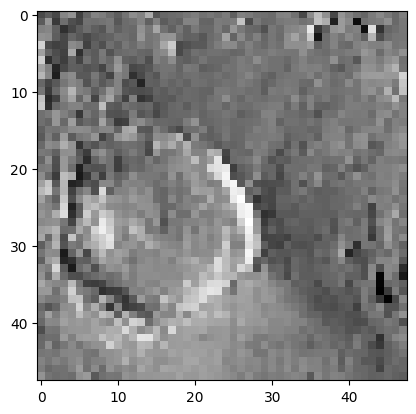

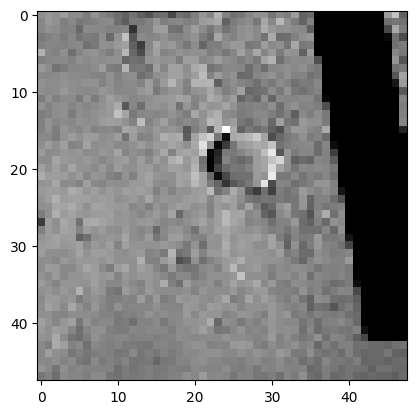

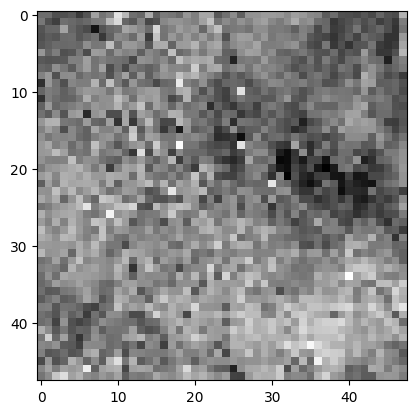

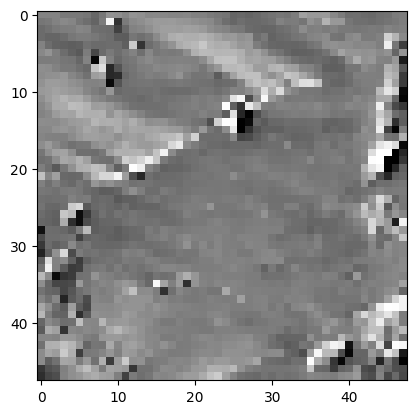

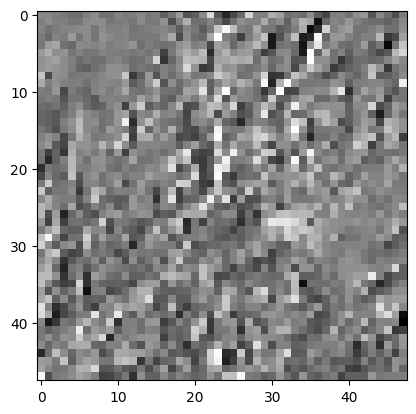

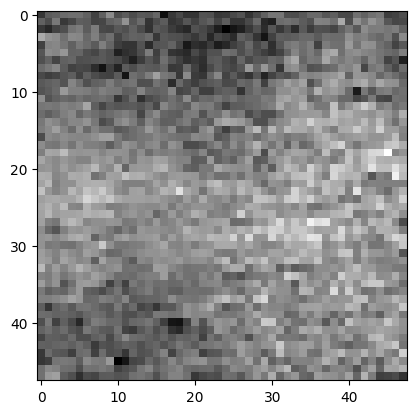

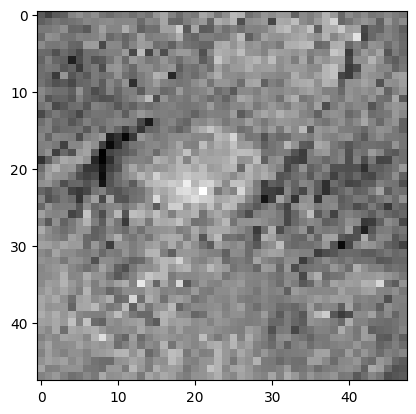

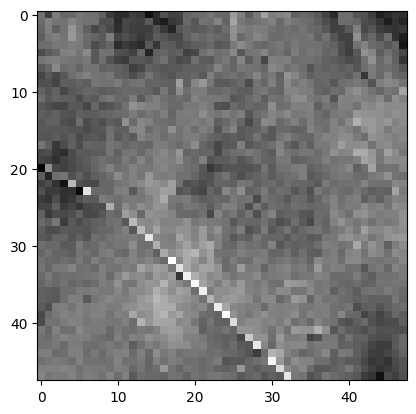

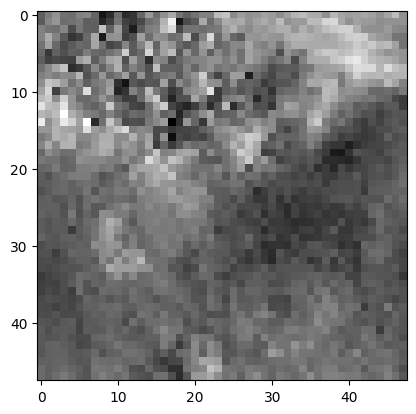

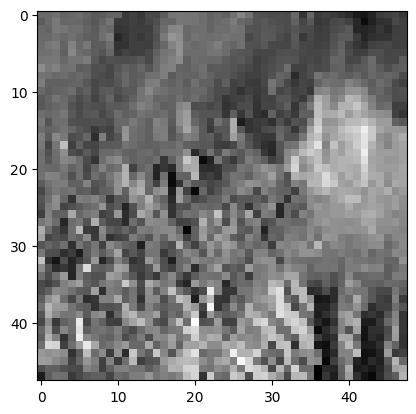

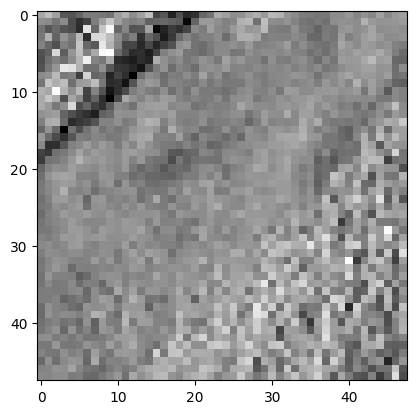

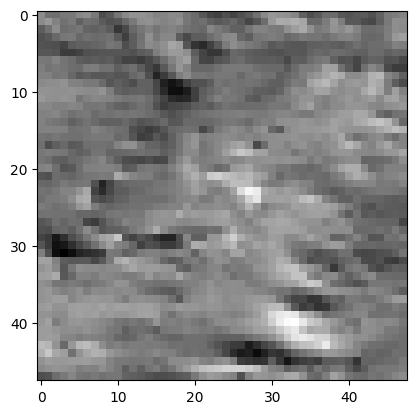

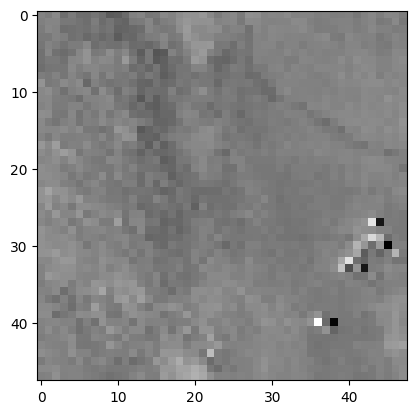

In [60]:
import keras
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt

x_test1=np.load('/content/Xtest1.npy')
x_train=np.load('/content/Xtrain1.npy')
y_train=np.load('/content/Ytrain1.npy')
x_extra1=np.load('/content/Xtrain1_extra.npy')

count_1=0
count_0=0
for x in y_train:
  if x==1:
    count_1=count_1+1
  else:
    count_0=count_0+1

print(count_1)
print(count_0)

print(x_train.shape)
print(y_train.shape)

for x in range (0,20):

  image=x_extra1[x].reshape((48,48))
  plt.imshow(image,cmap='gray')
  plt.show()

**Extra Dataset**

In [65]:
x_extra_r = np.reshape(x_extra1, (x_extra1.shape[0], 48, 48, 1)) #reshape
x_extra_n = x_extra_r / 255.0 #normalize
y_extra = model.predict(x_extra_n) #predict y_extra using de CNN model

#filter y_extra if it has more than 90% probability of having a crater or less than 10% probability of not having one
y_extra = [1 if x > 0.9 else 0 if x < 0.1 else -1 for x in y_extra]


x_extra_final = np.array([x_extra1[i] for i, y in enumerate(y_extra) if y in [0, 1]])
y_extra_final = np.array([y for y in y_extra if y in [0, 1]])

# Print the shapes
print(y_extra_final.shape)
print(x_extra_final.shape)

#count how many images with and without crater the extra dataset has
count_1=0
count_0=0
for x in y_extra_final:
  if x==1:
    count_1=count_1+1
  else:
    count_0=count_0+1


print(count_1)
print(count_0)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
(538,)
(538, 2304)
91
447


**80% Train, 20% Validation or 100% Train**

In [66]:
from sklearn.model_selection import train_test_split

# Reshape image_augmentation_array to have the same dimensions as x_train1
x_extra_final = x_extra_final.reshape(x_extra_final.shape[0], -1)

#combine original dataset with extra dataset
x_train=np.concatenate((x_train, x_extra_final), axis=0)
y_train=np.concatenate((y_train, y_extra_final), axis=0)

#x_train and y_train with 80% train and 20% validation
#x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size=0.2)

#x_train and y_train without dividing the dataset
x_train1=x_train
y_train1=y_train



**Data Augmentation**

In [ ]:
import os
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

# Define multiple augmentation layers
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),       # Flip horizontally
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.25),            # Rotate by 10%
    layers.RandomZoom(0.1),                # Zoom in/out by 10%
    layers.RandomTranslation(0.1, 0.1),              # Shift the image vertically by 10%               # Shift the image horizontally by 10%
    layers.RandomBrightness(0.1)           # Adjust brightness by 10%
]

image_augmentation = []
# Function to apply augmentations
def data_augmentation(X_train):
    for x in range(0,len(data_augmentation_layers)):
      layer=data_augmentation_layers[x]
      for y in range(0,(X_train.shape[0])):
        images = np.reshape(X_train[y], (48, 48, 1))
        images = layer(images)
        image_augmentation.append(images)

data_augmentation(x_train1)

# Optionally, convert the list to a NumPy array if needed
image_augmentation = np.array(image_augmentation)


**Data Augmentation Balanced**

In [67]:
import os
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

from random import randint

indexy=[]
# Define multiple augmentation layers
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),       # Flip horizontally
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.25),            # Rotate by 25%
    layers.RandomZoom(0.1),                # Zoom in/out by 10%
    layers.RandomTranslation(0.1, 0.1),              # Shift the image vertically by 10%               # Shift the image horizontally by 10%
    layers.RandomBrightness(0.1)           # Adjust brightness by 10%
]

image_augmentation = []
# Function to apply augmentations
def data_augmentation(X_train):
    for x in range(0,len(data_augmentation_layers)):
      layer=data_augmentation_layers[x]
      for y in range(0,(X_train.shape[0])):
        if y_train1[y]==1:
          p=randint(0,100)
          if 0<p<67:
              indexy.append(y_train1[y])
              images = np.reshape(X_train[y], (48, 48, 1))
              images = layer(images)
              image_augmentation.append(images)

        else:
          indexy.append(y_train1[y])
          images = np.reshape(X_train[y], (48, 48, 1))
          images = layer(images)
          image_augmentation.append(images)


data_augmentation(x_train1)

# Optionally, convert the list to a NumPy array if needed
image_augmentation = np.array(image_augmentation)


**Junction of the original dataset and the augmented data**

In [ ]:
image_augmentation_array = np.array(image_augmentation)

# Reshape image_augmentation_array to have the same dimensions as x_train1
image_augmentation_array = image_augmentation_array.reshape(image_augmentation_array.shape[0], -1)

# Combine the original X_train1 with the augmented images
print(x_train1.shape)
print(image_augmentation_array.shape)
X_combined = np.concatenate((x_train1, image_augmentation_array), axis=0)
print(X_combined.shape)
# Generate corresponding labels
y_combined = np.concatenate((y_train1, y_train1,y_train1,y_train1,y_train1,y_train1,y_train1), axis=0)
print(y_combined.shape)


(2783, 2304)
(16698, 2304)
(19481, 2304)
(19481,)


**Junction of the original dataset and the balanced augmentated data**

(3321, 2304)
(16000, 2304)
(19321, 2304)
(19321,)
[0 1 1 1 1 1 0 1 0 0 0 1]


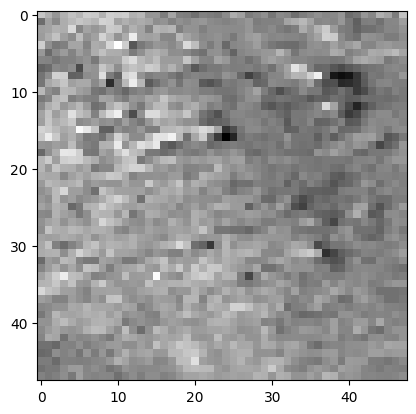

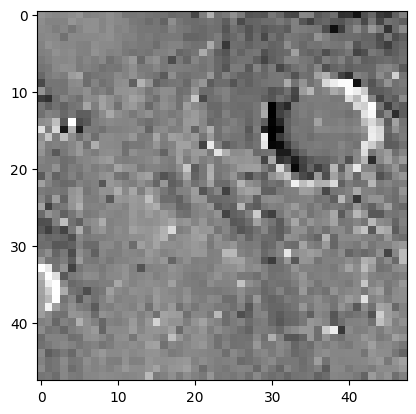

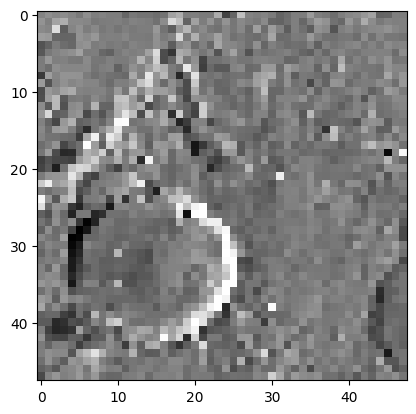

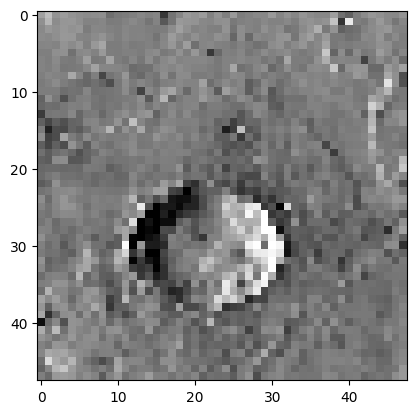

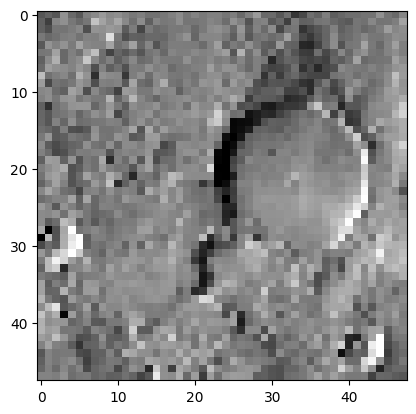

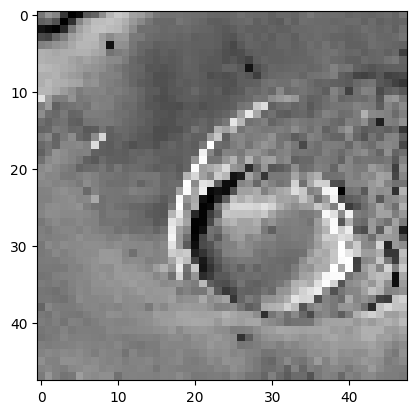

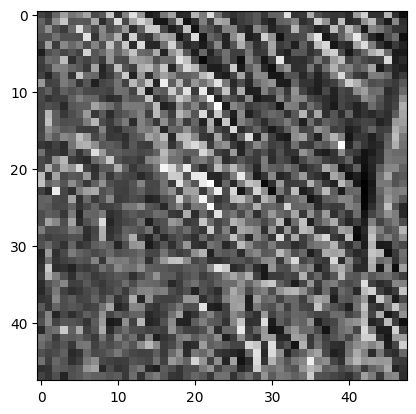

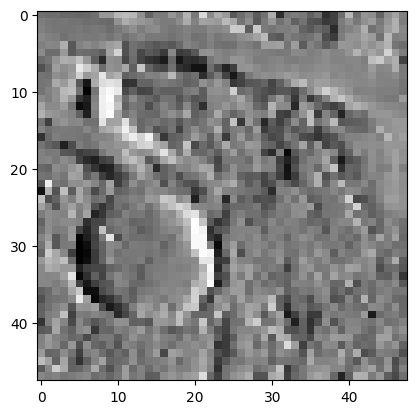

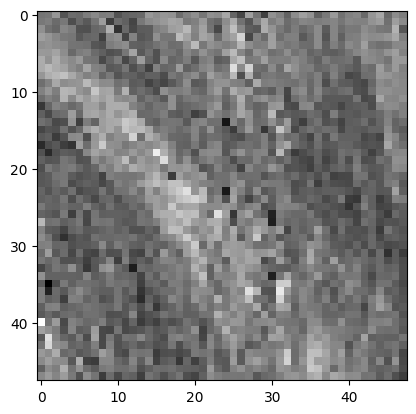

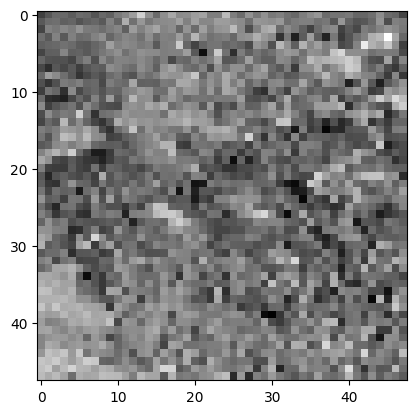

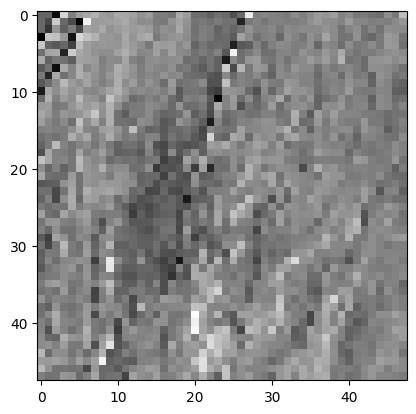

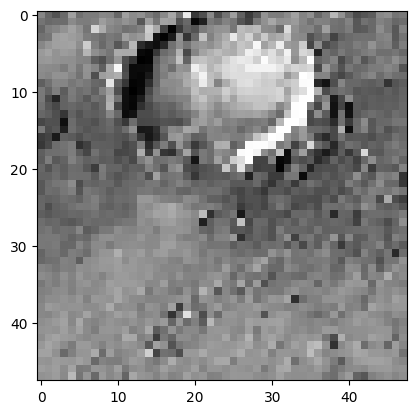

In [68]:
image_augmentation_array = np.array(image_augmentation)

# Reshape image_augmentation_array to have the same dimensions as x_train1
image_augmentation_array = image_augmentation_array.reshape(image_augmentation_array.shape[0], -1)

# Combine the original X_train1 with the augmented images
print(x_train1.shape)
print(image_augmentation_array.shape)
X_combined = np.concatenate((x_train1, image_augmentation_array), axis=0)
print(X_combined.shape)
# Generate corresponding labels
y_combined = np.concatenate((y_train1, indexy), axis=0)
print(y_combined.shape)
print(y_combined[8003:8015])
for x in range (8003,8015):

  image=X_combined[x].reshape((48,48))
  plt.imshow(image,cmap='gray')
  plt.show()

**KNN**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)  # You can change the number of neighbors (k)
knn.fit(x_train1, y_train1)

# Step 3: Predict the labels for the test set
y_pred = knn.predict(x_val)
a=0
for x in y_pred:

  print("yval:",y_val[a])
  a=a+1
  print("y_pred:",x)
  print("-------------")



yval: 0
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 0
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 0
y_pred: 0
-------------
yval: 0
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 0
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 0
y_pred: 0
-------------
yval: 0
y_pred: 0
-------------
yval: 0
y_pred: 0
-------------
yval: 0
y_pred: 0
-------------
yval: 0
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 0
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 0
y_pred: 0
-------------
yval: 0
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 0
y_pred: 0
-------------
yval: 1
y_pred: 0
-------------
yval: 1


**CNN**

In [69]:
import numpy as np
import tensorflow as tf
from keras import layers, models

# Reshape the flattened x_train (2000, 2304) into (2000, 48, 48, 1)
# where 1 is the number of channels (grayscale image)
x_train_reshaped = np.reshape(X_combined, (X_combined.shape[0], 48, 48, 1))

# Normalize the pixel values to the range [0, 1]
x_train_normalized = x_train_reshaped / 255.0

# Build the CNN model with Dropout layers to prevent overfitting
model = models.Sequential([
    # First convolutional layer with 32 filters and a 3x3 kernel
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),  # Max pooling to reduce dimensionality
    layers.Dropout(0.5),  # Dropout with 50% probability after first layer

    # Second convolutional layer with 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),  # Dropout with 50% probability after second layer

    # Third convolutional layer with 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the feature maps into a 1D vector for fully connected layers
    layers.Flatten(),

    # Dense layer with 64 units and Dropout
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout with 50% probability before final layer

    # Output layer with 1 unit (for binary classification)
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_normalized, y_combined, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6403 - loss: 0.6210 - val_accuracy: 0.8352 - val_loss: 0.3709
Epoch 2/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8113 - loss: 0.4263 - val_accuracy: 0.8481 - val_loss: 0.3382
Epoch 3/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8504 - loss: 0.3665 - val_accuracy: 0.8862 - val_loss: 0.3002
Epoch 4/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8609 - loss: 0.3522 - val_accuracy: 0.8862 - val_loss: 0.2793
Epoch 5/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8645 - loss: 0.3332 - val_accuracy: 0.8893 - val_loss: 0.2802
Epoch 6/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8720 - loss: 0.3122 - val_accuracy: 0.9012 - val_loss: 0.2385
Epoch 7/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8726 - loss: 0.3066 - val_accuracy: 0.9040 - val_loss: 0.2341
Epoch 8/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8826 - loss: 0.2881 - val_accuracy: 0.

**Test**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
[[5.8815004e-03]
 [9.9985361e-01]
 [9.9999976e-01]
 [9.8166209e-01]
 [3.0036652e-04]
 [7.5828958e-01]
 [9.9979776e-01]
 [9.8443395e-01]
 [9.9991632e-01]
 [9.1970092e-01]]
[0 1 1 1 0 1 1 1 1 1]


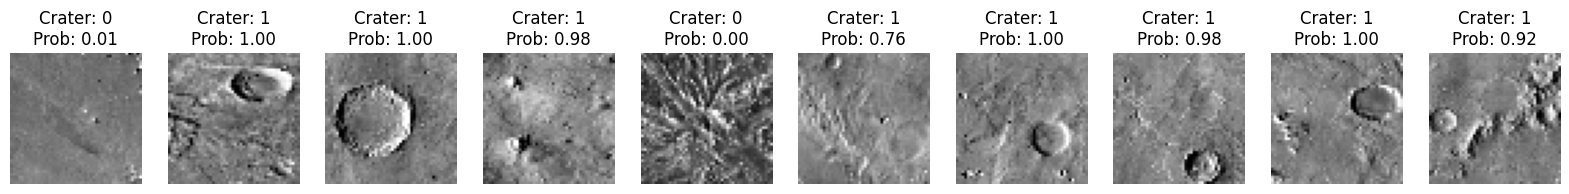

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_test_5_reshaped = np.reshape(x_train1[:10], (x_train1[:10].shape[0], 48, 48, 1))

# Normalize the pixel values to the range [0, 1] like you did during training
x_test_5_normalized = x_test_5_reshaped / 255.0

# Step 2: Use the trained model to make predictions on the 5 test images
predictions = model.predict(x_test_5_normalized)
print(predictions)
print(y_train1[:10])
# Step 3: Print the images and their predicted labels
plt.figure(figsize=(20, 20))  # Create a figure for displaying images

for i in range(10):
    plt.subplot(1, 10, i + 1)  # Create subplots to show 5 images in a row
    plt.imshow(x_test_5_reshaped[i].squeeze(), cmap='gray')  # Display the grayscale image
    plt.axis('off')  # Turn off axis labels for clarity

    # Get the predicted label (0 or 1) and probability score
    predicted_class = (predictions[i] > 0.5).astype(int)  # Binary classification: crater (1) or no crater (0)
    predicted_prob = predictions[i]  # Probability of having a crater

    # Title will show the predicted class and the probability
    plt.title(f'Crater: {predicted_class[0]}\nProb: {predicted_prob[0]:.2f}')

plt.show()  # Display the images and their predictions


**Cross Validation**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
from keras import layers, models
from sklearn.metrics import f1_score, precision_score, recall_score

# Define the number of folds for cross-validation
k = 5  # For example, 5-fold cross-validation

# Reshape the flattened x_train (2000, 2304) into (2000, 48, 48, 1)
# where 1 is the number of channels (grayscale image)
x_train_reshaped = np.reshape(X_combined, (X_combined.shape[0], 48, 48, 1))

# Normalize the pixel values to the range [0, 1]
x_train_normalized = x_train_reshaped / 255.0

# Define the K-Fold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# List to store the accuracy for each fold
fold_accuracies = []
f1_scores = []

# Start cross-validation loop
fold = 1
for train_index, val_index in kf.split(x_train_normalized):
    print(f"Training on fold {fold}...")

    # Split data into training and validation sets for this fold
    x_train_fold, x_val_fold = x_train_normalized[train_index], x_train_normalized[val_index]
    y_train_fold, y_val_fold = y_combined[train_index], y_combined[val_index]

    # Re-build the model for each fold (to ensure weights are reset)
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model on this fold
    history = model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32,
                        validation_data=(x_val_fold, y_val_fold), verbose=1)

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold} - Validation Accuracy: {val_acc * 100:.2f}%")
    predd=model.predict(x_val_fold)
    predd = [1 if x > 0.5 else 0 for x in predd]
    # Calculate F1 score
    f1 = f1_score(y_val_fold, predd, average='macro')
    f1_scores.append(f1)
    # Print the F1 score
    print(f'F1 Score: {f1}')

    # Store the accuracy for this fold
    fold_accuracies.append(val_acc)
    fold += 1

# Calculate and print the average accuracy across all folds
average_F1 = np.mean(f1_scores)
print(f"\nMacro cross-validated F1 score: {average_F1 * 100:.2f}%")
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage cross-validated accuracy: {average_accuracy * 100:.2f}%")


Training on fold 1...
Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6458 - loss: 0.6108 - val_accuracy: 0.8228 - val_loss: 0.4095
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8253 - loss: 0.4129 - val_accuracy: 0.8203 - val_loss: 0.4317
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8566 - loss: 0.3569 - val_accuracy: 0.8588 - val_loss: 0.3369
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8685 - loss: 0.3267 - val_accuracy: 0.8774 - val_loss: 0.2950
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8671 - loss: 0.3257 - val_accuracy: 0.8700 - val_loss: 0.3030
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8776 - loss: 0.2945 - val_accuracy: 0.8680 - val_loss: 0.3135
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8798 - loss: 0.2896 - val_accuracy: 0.8731 - val_loss: 0.2902
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8907 - loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5618 - loss: 0.6577 - val_accuracy: 0.8190 - val_loss: 0.4269
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8026 - loss: 0.4523 - val_accuracy: 0.8366 - val_loss: 0.3721
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8327 - loss: 0.3928 - val_accuracy: 0.8407 - val_loss: 0.3733
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8589 - loss: 0.3456 - val_accuracy: 0.8682 - val_loss: 0.3241
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8694 - loss: 0.3255 - val_accuracy: 0.8458 - val_loss: 0.3919
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8702 - loss: 0.3120 - val_accuracy: 0.8746 - val_loss: 0.3140
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8763 - loss: 0.2991 - val_accuracy: 0.8787 - val_loss: 0.3004
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8852 - loss: 0.2779 - val_accuracy: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5747 - loss: 0.6655 - val_accuracy: 0.8042 - val_loss: 0.4328
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8121 - loss: 0.4303 - val_accuracy: 0.8284 - val_loss: 0.4033
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8556 - loss: 0.3564 - val_accuracy: 0.8695 - val_loss: 0.3198
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8591 - loss: 0.3458 - val_accuracy: 0.8717 - val_loss: 0.3137
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8677 - loss: 0.3271 - val_accuracy: 0.8702 - val_loss: 0.3179
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8745 - loss: 0.3034 - val_accuracy: 0.8593 - val_loss: 0.3599
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8695 - loss: 0.3059 - val_accuracy: 0.8590 - val_loss: 0.3506
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8849 - loss: 0.2812 - val_accuracy: 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5798 - loss: 0.6527 - val_accuracy: 0.7917 - val_loss: 0.4687
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8047 - loss: 0.4352 - val_accuracy: 0.8565 - val_loss: 0.3551
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8356 - loss: 0.3916 - val_accuracy: 0.8544 - val_loss: 0.3473
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8568 - loss: 0.3460 - val_accuracy: 0.8797 - val_loss: 0.3018
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8595 - loss: 0.3310 - val_accuracy: 0.8269 - val_loss: 0.4073
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8727 - loss: 0.3049 - val_accuracy: 0.8794 - val_loss: 0.2886
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8795 - loss: 0.2901 - val_accuracy: 0.8870 - val_loss: 0.2716
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8863 - loss: 0.2845 - val_accuracy: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6120 - loss: 0.6349 - val_accuracy: 0.8434 - val_loss: 0.3751
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8216 - loss: 0.4165 - val_accuracy: 0.8386 - val_loss: 0.3933
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8529 - loss: 0.3540 - val_accuracy: 0.8455 - val_loss: 0.3882
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8644 - loss: 0.3347 - val_accuracy: 0.8284 - val_loss: 0.4397
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8675 - loss: 0.3172 - val_accuracy: 0.8950 - val_loss: 0.2574
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8807 - loss: 0.2889 - val_accuracy: 0.8766 - val_loss: 0.3087
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8822 - loss: 0.2867 - val_accuracy: 0.8335 - val_loss: 0.4695
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8892 - loss: 0.2693 - val_accuracy: 0.

**F1 score**

In [70]:
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np

# Reshape the training data
x_train1_r = np.reshape(x_train1, (x_train1.shape[0], 48, 48, 1))

# Normalize the pixel values to the range [0, 1]
x_train1_r_n = x_train1_r / 255.0

# Get model predictions
predictions = model.predict(x_train1_r_n)
#predictions= knn.predict(x_train1_r)

# Threshold predictions at 0.5 to get binary classification results
predd = [1 if x > 0.5 else 0 for x in predictions]

# Calculate F1 score using macro average
f1 = f1_score(y_train1, predd, average='macro')

# Print the F1 score
print(f'F1 Score (Macro): {f1}')

# Calculate precision and recall using macro average
precision = precision_score(y_train1, predd, average='macro')
recall = recall_score(y_train1, predd, average='macro')

# Print precision and recall
print(f'Precision (Macro): {precision}')
print(f'Recall (Macro): {recall}')


104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
F1 Score (Macro): 0.9340763835660648
Precision (Macro): 0.9324388094700583
Recall (Macro): 0.9375588570350644


**80% train, 20% test - test plus F1 score**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
[[0.8955296 ]
 [0.9991302 ]
 [0.8749612 ]
 [0.10521583]
 [0.7805047 ]
 [0.9666979 ]
 [0.00687889]
 [0.32832813]
 [0.12632878]
 [0.0121671 ]]
true: [1 1 1 0 1 0 0 1 0 1]


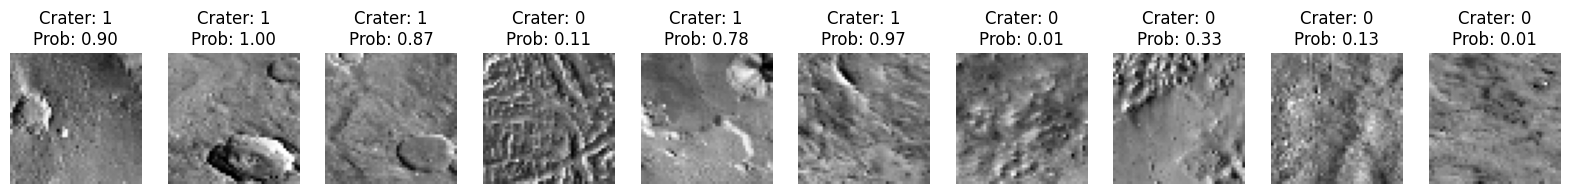

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
predd: [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
import numpy as np


x_test_5_reshaped = np.reshape(x_val[:10], (x_val[:10].shape[0], 48, 48, 1))

# Normalize the pixel values to the range [0, 1] like you did during training
x_test_5_normalized = x_test_5_reshaped / 255.0

# Step 2: Use the trained model to make predictions on the 5 test images
predictions = model.predict(x_test_5_normalized)
#predictions=knn.predict(x_val[:10])

print(predictions)
print("true:",y_val[:10])
# Step 3: Print the images and their predicted labels
plt.figure(figsize=(20, 20))  # Create a figure for displaying images

for i in range(10):
    plt.subplot(1, 10, i + 1)  # Create subplots to show 5 images in a row
    plt.imshow(x_test_5_reshaped[i].squeeze(), cmap='gray')  # Display the grayscale image
    plt.axis('off')  # Turn off axis labels for clarity

    # Get the predicted label (0 or 1) and probability score
    predicted_class = (predictions[i] > 0.5).astype(int)  # Binary classification: crater (1) or no crater (0)
    predicted_prob = predictions[i]  # Probability of having a crater

    # Title will show the predicted class and the probability
    plt.title(f'Crater: {predicted_class[0]}\nProb: {predicted_prob[0]:.2f}')

plt.show()  # Display the images and their predictions

#-------------------------------------------------------------------------------

x_train1_r = np.reshape(x_val, (x_val.shape[0], 48, 48, 1))

# Normalize the pixel values to the range [0, 1] like you did during training
x_train1_r_n = x_train1_r / 255.0

predictions = model.predict(x_train1_r_n)
#predictions=knn.predict(x_val)

predd = [1 if x > 0.5 else 0 for x in predictions]


print("predd:",predd)

# Calculate F1 score
f1 = f1_score(y_val, predd, average='macro')

# Print the F1 score
print(f'F1 Score: {f1}')


# Precision and recall for validation set
precision = precision_score(y_val, predd, average='macro')
recall = recall_score(y_val, predd, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')



**Final**

In [71]:
x_test1_r = np.reshape(x_test1, (x_test1.shape[0], 48, 48, 1))

# Normalize the pixel values to the range [0, 1] like you did during training
x_test1_r_n = x_test1_r / 255.0
predictions = model.predict(x_test1_r_n)
predd = [1 if x > 0.5 else 0 for x in predictions]
np.save('y_predicted.npy', predd) #Guardar vetor a entregar

print(predd)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,